# Tutorial: Distribution of Sample Means

## Introduction:
The distribution of sample means, often known as the sampling distribution of the mean, is the distribution of the averages of different samples of the same size taken from the same population. According to the Central Limit Theorem, if the sample size is large enough, the distribution of sample means will be approximately normally distributed regardless of the shape of the population distribution.

## Scenario:
Imagine a machine that fabricates light bulbs. Due to slight variations in the manufacturing process, not every bulb has the same lifespan. Let's explore the distribution of the sample means of the lifespans of these light bulbs.

## Steps:
1. Simulate the lifespans of light bulbs.
2. Draw multiple samples and compute their means.
3. Plot the distribution of sample means.

## Implementation:

### 1. Simulate the lifespans of light bulbs.

Let's assume the lifespan of a light bulb follows a non-normal distribution. We'll simulate this with a skewed distribution:


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy.stats import shapiro
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

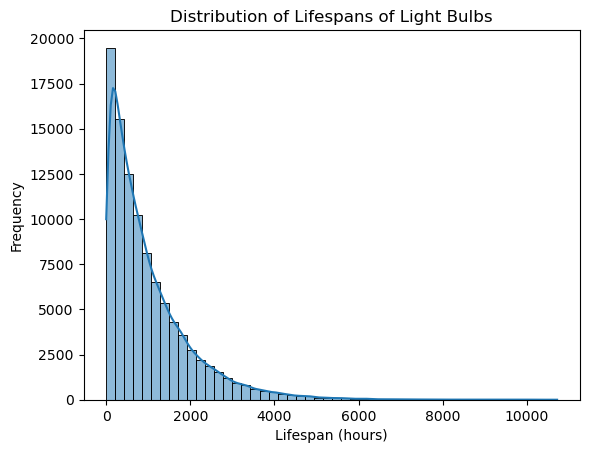

In [2]:
# Setting a random seed for reproducibility
np.random.seed(0)

# Simulate lifespans of 100,000 light bulbs
lifespans = np.random.exponential(scale=1000, size=100000)

# Plotting the distribution
sns.histplot(lifespans, bins=50, kde=True)
plt.title('Distribution of Lifespans of Light Bulbs')
plt.xlabel('Lifespan (hours)')
plt.ylabel('Frequency')
plt.show()

### 2. Draw multiple samples and compute their means.
Let's draw **1,000 samples**, each of **size 30**, from the light bulb population and compute their means.

In [3]:
sample_size = 30
num_samples = 1000

sample_means = []

for _ in range(num_samples):
    sample = np.random.choice(lifespans, size=sample_size)
    sample_means.append(np.mean(sample))

### 3. Plot the distribution of sample means.

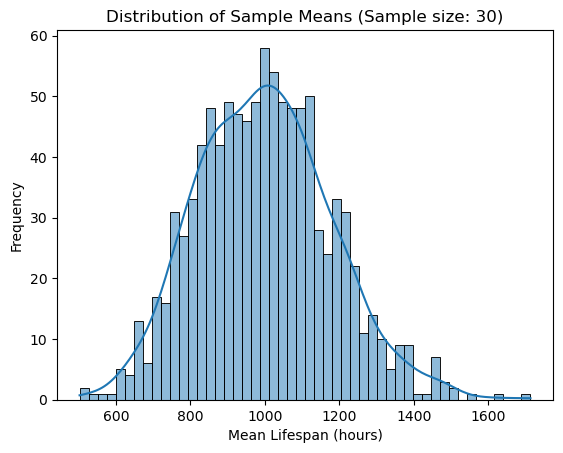

In [4]:
sns.histplot(sample_means, bins=50, kde=True)
plt.title('Distribution of Sample Means (Sample size: 30)')
plt.xlabel('Mean Lifespan (hours)')
plt.ylabel('Frequency')
plt.show()

You should see that the distribution of sample means looks more normal than the original distribution of lifespans, as predicted by the Central Limit Theorem.

### Additional Plots:
Let's look at the impact of increasing the sample size on the distribution of the sample means:

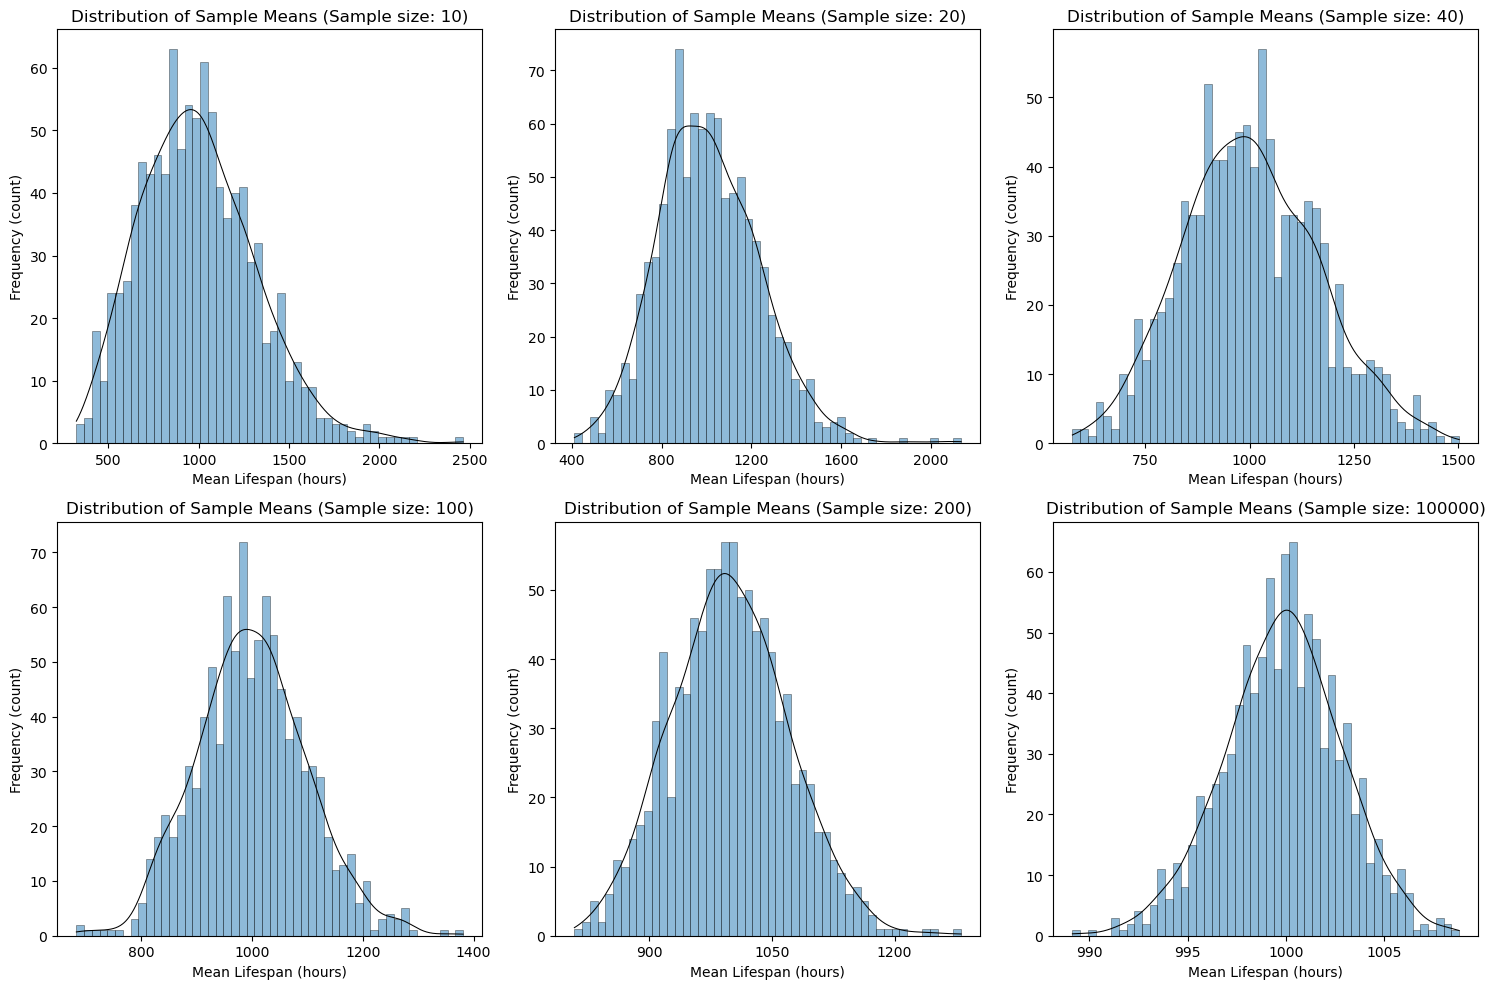

In [5]:
# Setting a random seed for reproducibility
np.random.seed(0)

# Assuming lifespans and num_samples are already defined
sample_sizes = [10, 20, 40, 100, 200, 100000]

# Initialize an empty list to store the list of sample_means for each sample size
sample_means = np.empty((len(sample_sizes), num_samples))
len_x_vals = 500
adjusted_KDE = np.empty((len(sample_sizes), len_x_vals))

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for idx, s_size in enumerate(sample_sizes):
    sample_means[idx, :] = np.array([np.mean(np.random.choice(lifespans, size=s_size)) for _ in range(num_samples)])
    
    ax = axes.flatten()[idx]  # Flatten the 2x3 grid and pick the appropriate axis
    n, bins, patches = ax.hist(sample_means[idx], bins=50, density=False, alpha=0.5, edgecolor='black', linewidth=0.5)  # Plot on the specific subplot axis
    ax.set_title(f'Distribution of Sample Means (Sample size: {s_size})')
    ax.set_xlabel('Mean Lifespan (hours)')
    ax.set_ylabel('Frequency (count)')
    
    # Limit the number of x-ticks for better clarity
    ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
    
    # Plot the KDE equivalent using matplotlib's `gaussian_kde`
    data_kde = gaussian_kde(sample_means[idx])

    x_vals = np.linspace(min(sample_means[idx]), max(sample_means[idx]), len_x_vals)
    adjusted_KDE[idx,:] = (data_kde(x_vals) * len(sample_means[idx]) * np.diff(bins)[0]).T
    ax.plot(x_vals, adjusted_KDE[idx,:], color='black', linewidth=0.75)

# Adjust the layout
plt.tight_layout()
plt.show()

#### With density instead of count

In [6]:
# # Initialize an empty list to store the list of sample_means for each sample size
# sample_means = np.empty((len(sample_sizes), num_samples))

# # Create a 2x3 grid of subplots
# fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# for idx, s_size in enumerate(sample_sizes):
#     # sample_means[idx, :] = np.array([np.mean(np.random.choice(lifespans, size=s_size)) for _ in range(num_samples)])
    
#     ax = axes.flatten()[idx]  # Flatten the 2x3 grid and pick the appropriate axis
#     ax.hist(sample_means[idx], bins=50, density=True, alpha=0.5, edgecolor='black', linewidth=0.5)  # Plot on the specific subplot axis
#     ax.set_title(f'Distribution of Sample Means (Sample size: {s_size})')
#     ax.set_xlabel('Mean Lifespan (hours)')
#     ax.set_ylabel('Frequency (density)')
    
#     # Plot the KDE equivalent using matplotlib's `gaussian_kde`
#     from scipy.stats import gaussian_kde
#     data_kde = gaussian_kde(sample_means[idx])
#     x_vals = np.linspace(min(sample_means[idx]), max(sample_means[idx]), 500)
#     ax.plot(x_vals, data_kde(x_vals), color='black', linewidth=0.75)

#     # Limit the number of x-ticks for better clarity
#     ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
    
# # Adjust the layout
# plt.tight_layout()
# plt.show()

#### Seaborn version

In [7]:
# # Initialize an empty list to store the list of sample_means for each sample size
# sample_means = np.empty((len(sample_sizes), num_samples))

# # Create a 2x3 grid of subplots
# fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# for idx, s_size in enumerate(sample_sizes):
#     # sample_means[idx, :] = np.array([np.mean(np.random.choice(lifespans, size=s_size)) for _ in range(num_samples)])
    
#     ax = axes.flatten()[idx]  # Flatten the 2x3 grid and pick the appropriate axis
#     sns.histplot(sample_means[idx], bins=50, kde=True, ax=ax)  # Plot on the specific subplot axis
#     ax.set_title(f'Distribution of Sample Means (Sample size: {s_size})')
#     ax.set_xlabel('Mean Lifespan (hours)')
#     ax.set_ylabel('Frequency')

# # Adjust the layout
# plt.tight_layout()
# plt.show()


#### 3D plot of the KDE's

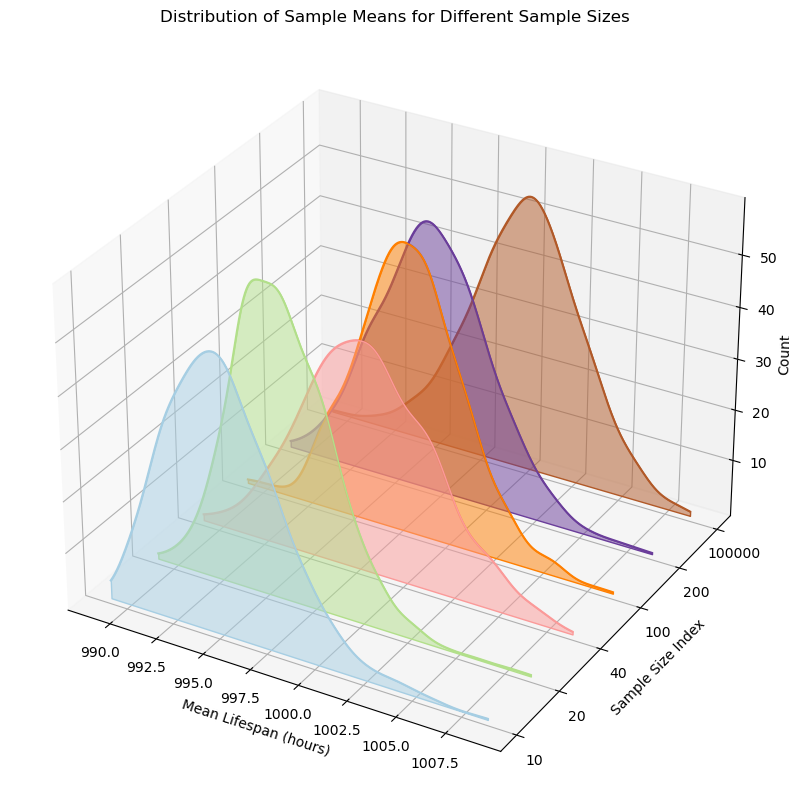

In [8]:
def stackplot(x_vals, Y_vals):

    # Create the 3D figure
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Get the Paired color map
    cmap = plt.cm.Paired
    colors = cmap(np.linspace(0, 1, len(sample_sizes)))

    for idx, color in enumerate(colors):

        # Plot the adjusted KDE on the 3D plot
        ax.plot(x_vals, Y_vals[idx], zs=idx, zdir='y', color=color)

        # Create a list of vertices for the polygon, but this time along the z-axis
        verts = [(x, idx, 0) for x in x_vals] + [(x, idx, y) for x, y in zip(x_vals, Y_vals[idx])][::-1]

        # Add the filled region with the unique color and transparency
        poly = Poly3DCollection([verts], color=color, alpha=0.5)
        ax.add_collection3d(poly)


    ax.set_xlabel('Mean Lifespan (hours)')
    ax.set_ylabel('Sample Size Index')
    ax.set_zlabel('Count', labelpad=0)  # Adjust the labelpad value to position the z-label
    ax.zaxis.label.set_rotation(90)  # Ensure the z-label is rotated for better visibility
    ax.zaxis.label.set_horizontalalignment('left')  # Adjust the horizontal alignment

    ax.set_yticks(range(len(sample_sizes)))
    ax.set_yticklabels(sample_sizes)
    ax.set_title('Distribution of Sample Means for Different Sample Sizes')

    # To manually adjust the position, you can use the following:
    # ax.zaxis.label.set_position((-x, -y))

    plt.show()
    
stackplot(x_vals, adjusted_KDE)

In [9]:
print(x_vals.shape)

(500,)


### Using the Shapiro-Wilk test to test whether our distribution of sample means are gaussian:

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution. In other words, if H0 is true, the curve is normal.

REMARK: it uses the histogram and not the KDE curve (black curves) on the graph above. The KDE (Kernel Density Estimation) is a non-parametric method used to estimate the probability density function (PDF) of a continuous random variable based on a finite set of data points

,Sample Size,Is Gaussian?,p-value
0,10,No,1.258263e-10
1,20,No,7.980167e-08
2,40,No,1.242851e-02
3,100,No,3.396162e-02
4,200,Yes,5.481688e-02
5,100000,Yes,6.685786e-01


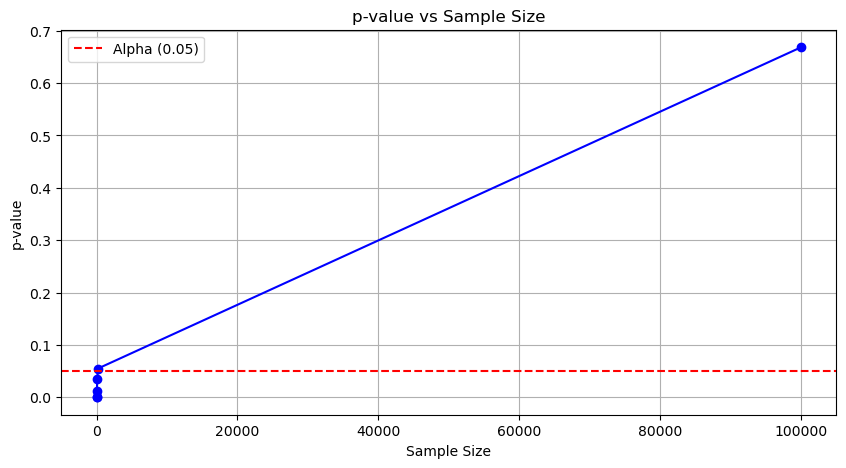

In [10]:
def gaussianity_test(data, alpha=0.05):
    """
    Check if the data is Gaussian using the Shapiro-Wilk test.
    Returns True if data is Gaussian, False otherwise, and the p-value.
    """
    stat, p = shapiro(data)
    return (p > alpha), p

# Create an empty list to store the results
results = []

for idx, s_size in enumerate(sample_sizes):

    gaussian_result, p_value = gaussianity_test(sample_means[idx])
    
    results.append({
        'Sample Size': s_size,
        'Is Gaussian?': 'Yes' if gaussian_result else 'No',
        'p-value': p_value
    })

# Convert the results to a pandas DataFrame and display
df = pd.DataFrame(results)
display(df)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df['Sample Size'], df['p-value'], marker='o', linestyle='-', color='b')
plt.axhline(y=0.05, color='r', linestyle='--', label='Alpha (0.05)')
plt.title('p-value vs Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('p-value')
plt.legend()
plt.grid(True)
plt.show()

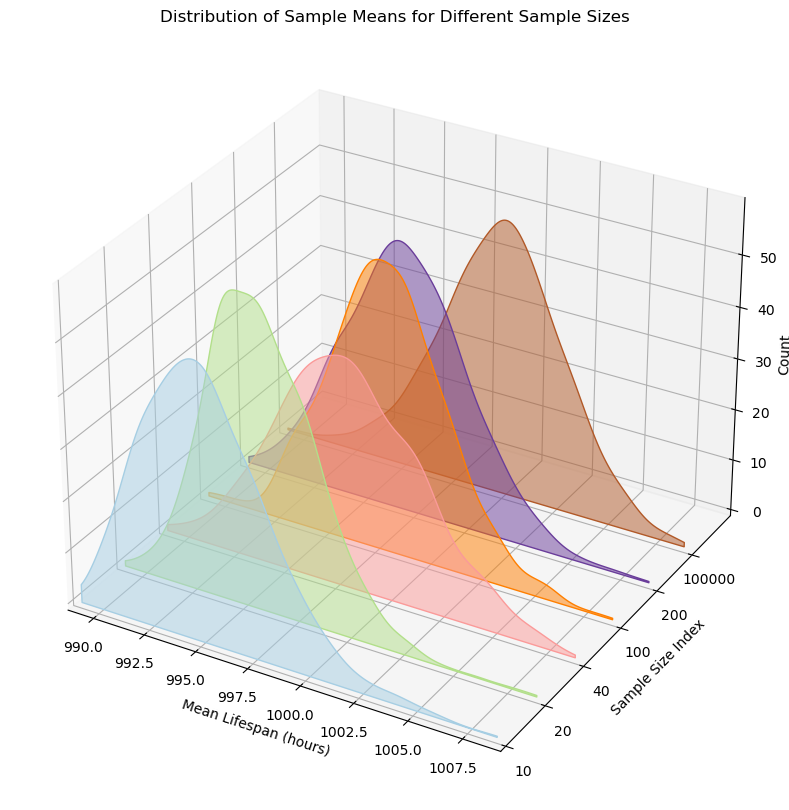

In [15]:
def stackplot(x_vals, Y_vals):

    # Create the 3D figure
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Get the Paired color map
    cmap = plt.cm.Paired
    colors = cmap(np.linspace(0, 1, len(Y_vals)))

    for idx, color in enumerate(colors):

        # Create a list of vertices for the polygon, but this time along the z-axis
        verts = [(x, idx, 0) for x in x_vals] + [(x, idx, y) for x, y in zip(x_vals, Y_vals[idx])][::-1]

        # Add the filled region with the unique color and transparency
        poly = Poly3DCollection([verts], color=color, alpha=0.5)
        ax.add_collection3d(poly)

    # Setting the limits for each axis
    ax.set_xlim([min(x_vals), max(x_vals)])
    ax.set_ylim([0, len(Y_vals)])
    ax.set_zlim([0, max([max(y) for y in Y_vals])])

    ax.set_xlabel('Mean Lifespan (hours)')
    ax.set_ylabel('Sample Size Index')
    ax.set_zlabel('Count', labelpad=0)
    ax.zaxis.label.set_rotation(90)
    ax.zaxis.label.set_horizontalalignment('left')

    ax.set_yticks(range(len(Y_vals)))
    # Assuming sample_sizes is a global variable or defined elsewhere in the code
    ax.set_yticklabels(sample_sizes)
    ax.set_title('Distribution of Sample Means for Different Sample Sizes')

    plt.show()

    
stackplot(x_vals, adjusted_KDE)